In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# the direction of the azimuth and elevation and array geometry
valid_azi_directions = [30, 25, 20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30]
for idx in range(len(valid_azi_directions)):
    valid_azi_directions[idx] += 90

valid_azi_directions_noise = [22.5 + x*45 for x in range(8)]
valid_ele_directions_noise = np.zeros(8)

valid_ele_directions = [-10, -5, 0, 5, 10]
source_distance = 5
array_geometry = [ # x y z
        [-0.35,0,0],
        [0,0,0],
        [0,-0.6,0],
        [0.35,0,0],
        [0,0.6,0]
    ]

In [24]:
def sph2cart(sph_coord,mode='degree'):
    """function to convert spherical to cartesian coordinates"""

    if isinstance(sph_coord,list):
        sph_coord = np.array(sph_coord)

    if sph_coord.ndim>1:
        radius = sph_coord[:,0]
        azimuth = sph_coord[:,1]
        elevation = sph_coord[:,2]
    else:
        radius = sph_coord[0]
        azimuth = sph_coord[1]
        elevation = sph_coord[2]

    # convert from degree to radian
    if mode == 'degree':
        azimuth = np.radians(azimuth)
        elevation = np.radians(elevation)

    # convert to cartesian coordinates
    x = radius * np.cos(elevation) * np.cos(azimuth)
    y = radius * np.cos(elevation) * np.sin(azimuth)
    z = radius * np.sin(elevation)

    if sph_coord.ndim>1:
        cart_coord = np.concatenate((x[:,None],y[:,None],z[:,None]),axis=1)
    else:
        cart_coord = np.array((x,y,z))

    return cart_coord

In [25]:
def plotPosition(source_distance,valid_azi_directions,valid_ele_directions, array_geometry):
    '''Plots the array geometry and the position of the sound source in a 3d kartesian coordinate system
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(array_geometry)):
        ax.scatter(array_geometry[i][0], array_geometry[i][1], array_geometry[i][2], c='r', marker='o')
        #ax.text(array_geometry[i][0], array_geometry[i][1], array_geometry[i][2], f"{i+1}", color='black')

    for azi in valid_azi_directions:
        for ele in valid_ele_directions:
            pos = sph2cart([source_distance,azi+90,ele])
            ax.scatter(pos[0], pos[1], pos[2], c='b', marker='x')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # berechne die abstände der mikrofone zum schallquellpunkt
    """ distances = []
    for mic in array_geometry:
        distances.append(((pos[0]-mic[0])**2 + (pos[1]-mic[1])**2 + (pos[2]-mic[2])**2)**0.5)

    # print lowest distance and the index of the microphone with the lowest distance
    min_distance = min(distances)
    min_distance_index = distances.index(min_distance)
    print(f"Minimum distance: {min_distance} at index {min_distance_index}")

    # plot a line from the sound source to the microphone with the lowest distance
    ax.plot([pos[0], array_geometry[min_distance_index][0]], 
            [pos[1], array_geometry[min_distance_index][1]], 
            [pos[2], array_geometry[min_distance_index][2]], 
            c='g') """

    plt.ion()
    plt.show()

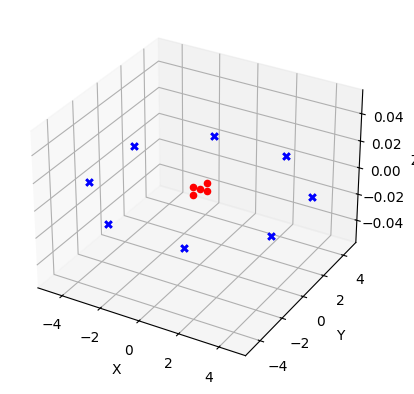

In [26]:
plotPosition(source_distance, 
            valid_azi_directions_noise, 
            valid_ele_directions_noise,
            array_geometry)